<a href="https://colab.research.google.com/github/SamaraMoreira/AbxTecnologia/blob/main/AbxTecnologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anotações:

Variáveis Numéricas:

*   maiorAtraso
*   margemBrutaAcumulada
*   percentualProtestos
*   prazoMedioRecebimentoVendas
*   titulosEmAberto
*   valorSolicitado
*   diferencaPercentualRisco
*   percentualRisco
*   dashboardCorrelacao
*   valorAprovado
*   ativoCirculante
*   passivoCirculante
*   totalAtivo
*   endividamento
*   duplicatasAReceber
*   estoque
*   faturamentoBruto
*   margemBruta
*   custos
*   anoFundacao
*   capitalSocial
*   scorePontualidade
*   limiteEmpresaAnaliseCredito

Variáveis Categóricas

*  status
*  definicaoRisco
*  primeiraCompra
*  periodoBalanco
*  intervaloFundacao
*  dataAprovadoEmComite
*  dataAprovadoNivelAnalista

Variáveis Binárias:
*  restricoes
*   empresa_MeEppMei



In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (f1_score
                             , accuracy_score
                             , precision_score
                             , recall_score
                             , classification_report)

In [95]:
dados = pd.read_csv("/content/solicitacoescredito.csv")

In [96]:
df = pd.DataFrame(dados)


In [97]:
colunas = df.columns.values


In [98]:
colunas

array(['numero_solicitacao', 'razaoSocial', 'nomeFantasia',
       'cnpjSemTraco', 'maiorAtraso', 'margemBrutaAcumulada',
       'percentualProtestos', 'primeiraCompra',
       'prazoMedioRecebimentoVendas', 'titulosEmAberto',
       'valorSolicitado', 'status', 'definicaoRisco',
       'diferencaPercentualRisco', 'percentualRisco',
       'dashboardCorrelacao', 'valorAprovado', 'dataAprovadoEmComite',
       'periodoBalanco', 'ativoCirculante', 'passivoCirculante',
       'totalAtivo', 'totalPatrimonioLiquido', 'endividamento',
       'duplicatasAReceber', 'estoque', 'faturamentoBruto', 'margemBruta',
       'periodoDemonstrativoEmMeses', 'custos', 'anoFundacao',
       'intervaloFundacao', 'capitalSocial', 'restricoes',
       'empresa_MeEppMei', 'scorePontualidade',
       'limiteEmpresaAnaliseCredito', 'dataAprovadoNivelAnalista'],
      dtype=object)

In [99]:
df.head()


,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,...,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.0,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,...,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.0,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,...,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.0,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,...,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.0,89000.0,2020-02-04T15:06:28


In [100]:
# Verificar onde estão os valores nulos
valores_nulos = df.isnull()

# Contar o número de valores nulos em cada coluna
contagem_nulos_por_coluna = valores_nulos.sum()

In [ ]:
contagem_nulos_por_coluna

In [102]:
# Calcular a moda de cada coluna
moda_por_coluna = df.mode().iloc[0]

# Preencher valores nulos com a moda de cada coluna
dados_sem_null = df.fillna(moda_por_coluna)



In [103]:
df.head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,...,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.0,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,...,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.0,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,...,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.0,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,...,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.0,89000.0,2020-02-04T15:06:28


In [104]:
# Verificar se os valores foram preenchidos com a moda
valores_nulos = dados_sem_null.isnull()

contagem_nulos_por_coluna = valores_nulos.sum()

In [ ]:
contagem_nulos_por_coluna

In [42]:
dados_sem_null.head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,...,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.0,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,0.0,2019-06-12T17:28:31,0,0.00,...,12.0,0.0,2017.0,Acima de 17 anos,100000.0,False,False,0.0,0.0,2020-02-03T20:57:33
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,...,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.0,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,0.0,2017-02-13T17:20:27,0,0.00,...,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.0,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,...,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.0,89000.0,2020-02-04T15:06:28


In [ ]:
print(dados_sem_null.info())

In [109]:
# Transformar as colunas 'restricoes' e 'empresa_MeEppMei' em valores binários (0 ou 1)
dados_sem_null['restricoes'] = dados_sem_null['restricoes'].astype(int)
dados_sem_null['empresa_MeEppMei'] = dados_sem_null['empresa_MeEppMei'].astype(int)

# Exibir os primeiros registros após a transformação
print(dados_sem_null['restricoes'].head())
print(dados_sem_null['empresa_MeEppMei'].head())



0    0
1    0
2    0
3    0
4    0
Name: restricoes, dtype: int64
0    1
1    0
2    1
3    1
4    0
Name: empresa_MeEppMei, dtype: int64


In [110]:
# Filtrar as colunas do tipo 'object'
colunas_object = dados_sem_null.select_dtypes(include=['object'])

# Exibir as primeiras linhas das colunas filtradas
print(colunas_object.head())


              razaoSocial        nomeFantasia        cnpjSemTraco  \
0  James Richardson-Patel  Alexandra Williams  KEBE17609492220843   
1      Dr. Geoffrey Walsh   Mr. Darren Arnold  JRBK88908250677300   
2           Joanna Hudson      Dr. David Rees  GCVQ28531614261293   
3    Gordon Jones-Hopkins    Sara Reid-Robson  KJND32266018316396   
4               Nigel Lee  Dr. Stanley Duncan  CGQN15826802440348   

        primeiraCompra                 status             definicaoRisco  \
0  2015-12-10T00:00:00       AprovadoAnalista       De 11 a 30 % - Baixo   
1  2019-06-12T17:28:31  DocumentacaoReprovada  De 0 a 10 % - Muito Baixo   
2  2019-11-27T00:00:00       AprovadoAnalista       De 11 a 30 % - Baixo   
3  2017-02-13T17:20:27       AprovadoAnalista        De 51 a 80 % - Alto   
4  2010-07-13T00:00:00       AprovadoAnalista       De 11 a 30 % - Baixo   

  dataAprovadoEmComite       periodoBalanco intervaloFundacao  \
0  2020-02-05T19:14:37  2019-12-31T03:00:00  Acima de 17 anos  

In [111]:
# Filtrar as colunas do tipo 'object'
colunas_object = dados_sem_null.select_dtypes(include=['object'])

# Exibir as primeiras linhas das colunas filtradas
print(colunas_object.head())

              razaoSocial        nomeFantasia        cnpjSemTraco  \
0  James Richardson-Patel  Alexandra Williams  KEBE17609492220843   
1      Dr. Geoffrey Walsh   Mr. Darren Arnold  JRBK88908250677300   
2           Joanna Hudson      Dr. David Rees  GCVQ28531614261293   
3    Gordon Jones-Hopkins    Sara Reid-Robson  KJND32266018316396   
4               Nigel Lee  Dr. Stanley Duncan  CGQN15826802440348   

        primeiraCompra                 status             definicaoRisco  \
0  2015-12-10T00:00:00       AprovadoAnalista       De 11 a 30 % - Baixo   
1  2019-06-12T17:28:31  DocumentacaoReprovada  De 0 a 10 % - Muito Baixo   
2  2019-11-27T00:00:00       AprovadoAnalista       De 11 a 30 % - Baixo   
3  2017-02-13T17:20:27       AprovadoAnalista        De 51 a 80 % - Alto   
4  2010-07-13T00:00:00       AprovadoAnalista       De 11 a 30 % - Baixo   

  dataAprovadoEmComite       periodoBalanco intervaloFundacao  \
0  2020-02-05T19:14:37  2019-12-31T03:00:00  Acima de 17 anos  

In [112]:
import pandas as pd

# Supondo que você já tenha os dados carregados em um DataFrame chamado dados_sem_null
colunasData = ['periodoBalanco', 'dataAprovadoNivelAnalista', 'dataAprovadoEmComite', 'primeiraCompra']

# Função para verificar se uma data está dentro do intervalo válido
def is_valid_date(date):
    try:
        pd.to_datetime(date)
        return True
    except (TypeError, ValueError):
        return False

# Convertendo as colunas de datas para o formato desejado (DDMMYYYY), sem o horário
for coluna in colunasData:
    dados_sem_null[coluna] = dados_sem_null[coluna].apply(lambda x: pd.to_datetime(x).strftime('%d%m%Y') if is_valid_date(x) else x)

# Exibindo as primeiras linhas após a conversão
print(dados_sem_null[colunasData].head())


  periodoBalanco dataAprovadoNivelAnalista dataAprovadoEmComite primeiraCompra
0       31122019                  03022020             05022020       10122015
1       31122019                  03022020             05022020       12062019
2       31122019                  04022020             05022020       27112019
3       31122019                  04022020             05022020       13022017
4       30092019                  04022020             05022020       13072010


O dataset está sem valores nulos e os valores float e object interssantes foram tratados


In [113]:
colunas = [
    'margemBrutaAcumulada', 'percentualProtestos',
    'prazoMedioRecebimentoVendas', 'titulosEmAberto', 'valorSolicitado',
    'diferencaPercentualRisco', 'percentualRisco',
    'dashboardCorrelacao', 'valorAprovado', 'endividamento', 'faturamentoBruto'
]

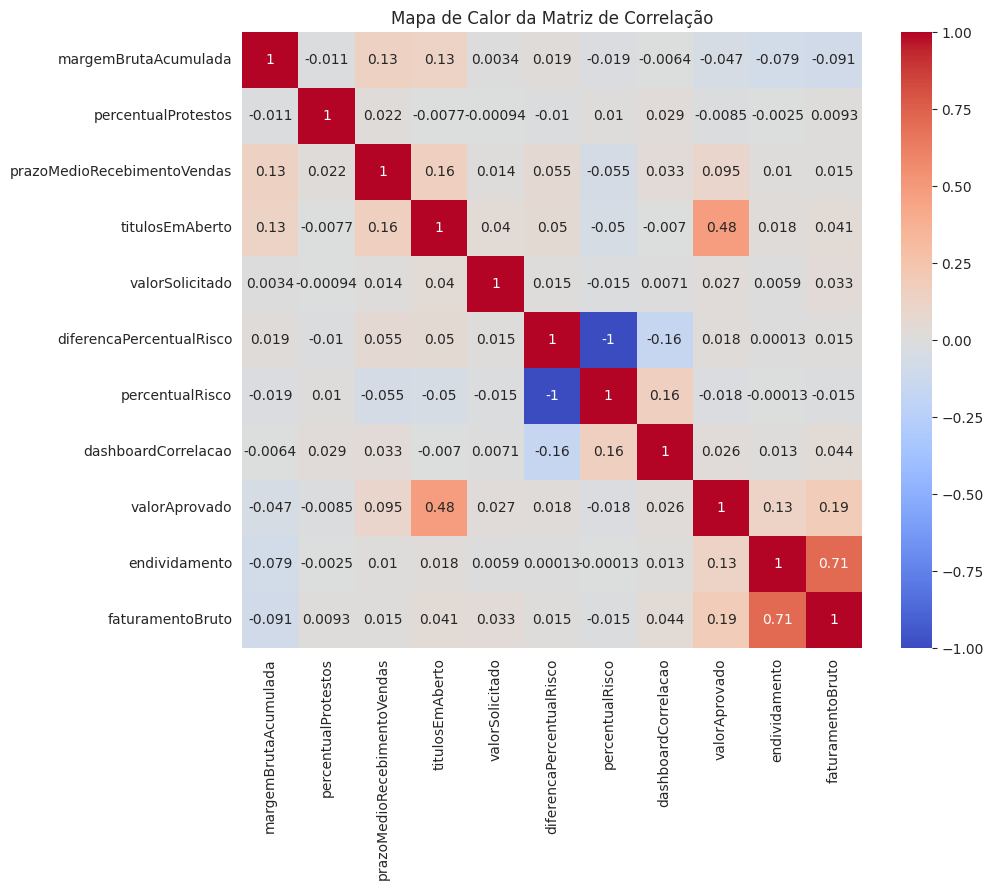

In [116]:
# Selecionar apenas as colunas desejadas
dados_selecionados = dados_sem_null[colunas]

# Calcular a matriz de correlação
correlacao = dados_selecionados.corr()

# Ajustar o tamanho da figura
plt.figure(figsize=(10, 8))

# Plotar o mapa de calor da matriz de correlação
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()



In [117]:
tipos_de_dados = dados_sem_null.dtypes
print(tipos_de_dados)

numero_solicitacao               int64
razaoSocial                     object
nomeFantasia                    object
cnpjSemTraco                    object
maiorAtraso                      int64
margemBrutaAcumulada           float64
percentualProtestos            float64
primeiraCompra                  object
prazoMedioRecebimentoVendas      int64
titulosEmAberto                float64
valorSolicitado                float64
status                          object
definicaoRisco                  object
diferencaPercentualRisco       float64
percentualRisco                float64
dashboardCorrelacao            float64
valorAprovado                  float64
dataAprovadoEmComite            object
periodoBalanco                  object
ativoCirculante                float64
passivoCirculante              float64
totalAtivo                     float64
totalPatrimonioLiquido         float64
endividamento                  float64
duplicatasAReceber             float64
estoque                  

In [118]:
"""Forma que entregamos uma classificação quanto ao tamanho da empresa"""
def classificar_nivel(faturamento, endividamento, ano_fundacao):
    if faturamento > 1000000 and endividamento < 0.5 and ano_fundacao < 2000:
        return 1  # Grande Nível
    elif faturamento > 500000 and endividamento < 0.7 and ano_fundacao < 2010:
        return 2  # Médio Nível
    else:
        return 3  # Baixo Nível

# Aplicando a função para classificar os clientes e criando novas colunas
dados_sem_null['grande_nivel'] = dados_sem_null.apply(lambda row: 1 if classificar_nivel(row['faturamentoBruto'], row['endividamento'], row['anoFundacao']) == 1 else 0, axis=1)
dados_sem_null['medio_nivel'] = dados_sem_null.apply(lambda row: 1 if classificar_nivel(row['faturamentoBruto'], row['endividamento'], row['anoFundacao']) == 2 else 0, axis=1)
dados_sem_null['baixo_nivel'] = dados_sem_null.apply(lambda row: 1 if classificar_nivel(row['faturamentoBruto'], row['endividamento'], row['anoFundacao']) == 3 else 0, axis=1)

# Exibindo as primeiras linhas do DataFrame com as novas colunas
print(dados_sem_null.head())


   numero_solicitacao             razaoSocial        nomeFantasia  \
0                   1  James Richardson-Patel  Alexandra Williams   
1                   2      Dr. Geoffrey Walsh   Mr. Darren Arnold   
2                   3           Joanna Hudson      Dr. David Rees   
3                   4    Gordon Jones-Hopkins    Sara Reid-Robson   
4                   5               Nigel Lee  Dr. Stanley Duncan   

         cnpjSemTraco  maiorAtraso  margemBrutaAcumulada  percentualProtestos  \
0  KEBE17609492220843            0              0.252448                  0.0   
1  JRBK88908250677300            0              0.000000                  0.0   
2  GCVQ28531614261293            4              0.624777                  0.0   
3  KJND32266018316396           20              0.000000                  0.0   
4  CGQN15826802440348           20              0.454088                  0.0   

  primeiraCompra  prazoMedioRecebimentoVendas  titulosEmAberto  ...  \
0       10122015           

In [119]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Selecionando os atributos relevantes para a clusterização
features = [
    'margemBrutaAcumulada', 'percentualProtestos',
    'prazoMedioRecebimentoVendas', 'titulosEmAberto', 'valorSolicitado',
    'diferencaPercentualRisco', 'percentualRisco',
    'dashboardCorrelacao', 'valorAprovado', 'endividamento', 'faturamentoBruto'
]
# Selecionando apenas os atributos relevantes
X = dados_sem_null[features]

# Lidando com valores ausentes, se houver
X.fillna(0, inplace=True)  # Por exemplo, substituindo valores ausentes por 0

# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduzindo a dimensionalidade dos dados com PCA
pca = PCA(n_components=10)  # Escolhendo 2 componentes principais
X_pca = pca.fit_transform(X_scaled)

# Escolhendo o número de clusters
n_clusters = 5  # Você pode ajustar o número de clusters conforme necessário

# Criando o modelo K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fazendo a clusterização nos dados reduzidos
clusters = kmeans.fit_predict(X_pca)

# Adicionando as informações dos clusters de volta ao DataFrame original
dados_sem_null['segmento_cliente'] = clusters

# Contando o número de clientes em cada segmento
contagem_segmentos = dados_sem_null['segmento_cliente'].value_counts()

print("Contagem de clientes em cada segmento após redução de dimensionalidade:")
print(contagem_segmentos)


<ipython-input-119-186b1dbcf552>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)  # Por exemplo, substituindo valores ausentes por 0
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Contagem de clientes em cada segmento após redução de dimensionalidade:
segmento_cliente
0    4889
4    3685
2     358
1      35
3       6
Name: count, dtype: int64


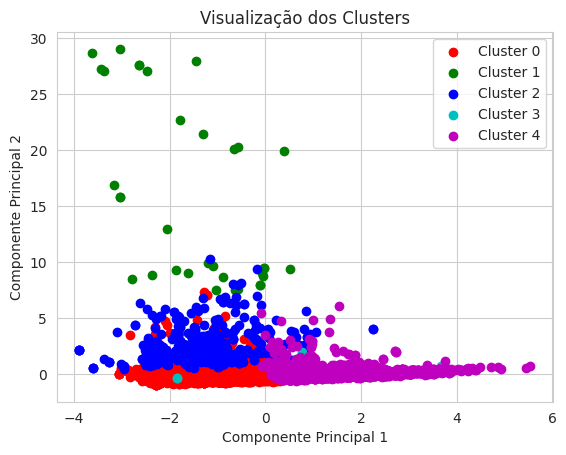

In [120]:
import matplotlib.pyplot as plt

# Criando uma paleta de cores para os clusters
cores = ['r', 'g', 'b', 'c', 'm']

# Plotando os pontos para cada cliente
for cluster in range(n_clusters):
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], c=cores[cluster], label=f'Cluster {cluster}')

# Adicionando legendas e rótulos aos eixos
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualização dos Clusters')
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.show()


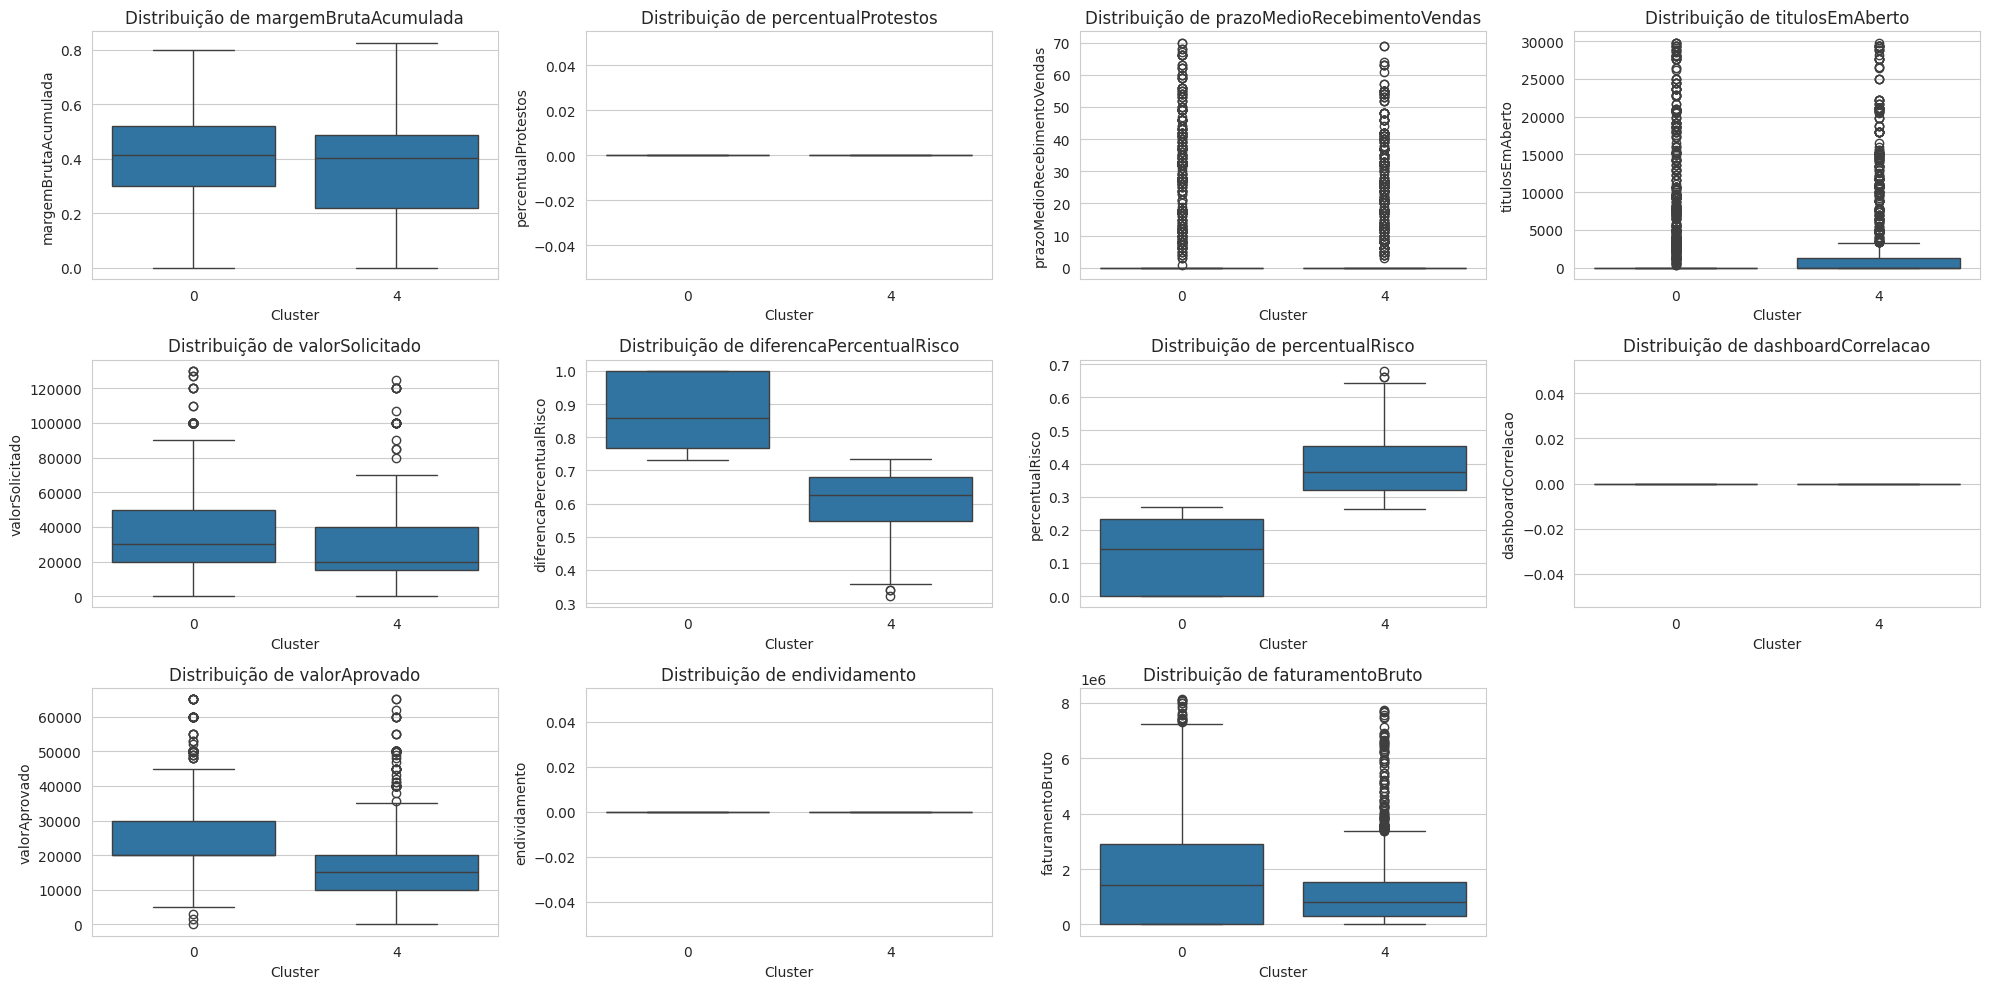

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Função para remover outliers
def remove_outliers(df, columns):
    clean_df = df.copy()
    for col in columns:
        Q1 = clean_df[col].quantile(0.25)
        Q3 = clean_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        clean_df = clean_df[(clean_df[col] >= lower_bound) & (clean_df[col] <= upper_bound)]
    return clean_df

# Remover outliers dos dados
clean_data = remove_outliers(dados_sem_null, features)

# Plotar os boxplots com os dados limpos
plt.figure(figsize=(20, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x='segmento_cliente', y=feature, data=clean_data)
    plt.title(f'Distribuição de {feature}')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


In [122]:
"Pude analisar que os valores solicitados variam de 20000 a 40000 mil, onde a a parte mais aprovada é para as empresas que pedem entre 10000 a 30000"

'Pude analisar que os valores solicitados variam de 20000 a 40000 mil, onde a a parte mais aprovada é para as empresas que pedem entre 10000 a 30000'

In [123]:
# Criar uma nova coluna para representar a faixa de valores de solicitação de crédito
def categorize_valor_solicitado(valor):
    if valor <= 20000:
        return 'baixo'
    elif 20000 < valor <= 30000:
        return 'médio'
    else:
        return 'alto'

dados_sem_null['faixa_valor_solicitado'] = dados_sem_null['valorSolicitado'].apply(categorize_valor_solicitado)

# Visualizar as primeiras linhas para verificar se a nova coluna foi adicionada corretamente
print(dados_sem_null[['valorSolicitado', 'faixa_valor_solicitado']].head())


   valorSolicitado faixa_valor_solicitado
0          50000.0                   alto
1          10000.0                  baixo
2          20000.0                  baixo
3          25000.0                  médio
4          50000.0                   alto


In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Selecionar as features para o modelo
features = [
    'margemBrutaAcumulada', 'percentualProtestos',
    'prazoMedioRecebimentoVendas', 'titulosEmAberto', 'valorSolicitado',
    'diferencaPercentualRisco', 'percentualRisco',
    'dashboardCorrelacao', 'valorAprovado', 'endividamento', 'faturamentoBruto',
    'scorePontualidade', 'restricoes',
    'faixa_valor_solicitado'  # Adicionar a nova variável criada
]

# Selecionar apenas as features relevantes
X = dados_sem_null[features]

# Converter variáveis categóricas em colunas numéricas binárias (codificação one-hot)
X_encoded = pd.get_dummies(X)

# Definir a variável alvo
y = dados_sem_null['grande_nivel']  # Ou 'medio_nivel' ou 'baixo_nivel'

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Inicializar e treinar o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Contar quantas previsões foram aprovadas (1) e não aprovadas (0)
contagem_aprovados = (y_pred == 1).sum()
contagem_nao_aprovados = (y_pred == 0).sum()

print("Número de clientes aprovados:", contagem_aprovados)
print("Número de clientes não aprovados:", contagem_nao_aprovados)


# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo de classificação:", accuracy)


Número de clientes aprovados: 52
Número de clientes não aprovados: 1743
Acurácia do modelo de classificação: 0.8445682451253482


In [177]:
# Preparação dos dados do novo cliente
novo_cliente = pd.DataFrame({
    'margemBrutaAcumulada': [25000],
    'percentualProtestos': [0.05],
    'prazoMedioRecebimentoVendas': [30],
    'titulosEmAberto': [2],
    'valorSolicitado': [200000], #Para testar aumente o valor solicitado
    'diferencaPercentualRisco': [0.02],
    'percentualRisco': [0.1],
    'dashboardCorrelacao': [0.7],
    'valorAprovado': [20000],
    'endividamento': [0.3],
    'faturamentoBruto': [45000],
    'scorePontualidade': [0.9],
    'restricoes': [0],
})



In [178]:
# Definir a função para categorizar o valor solicitado
def categorize_valor_solicitado(valor):
    if valor <= 20000:
        return 'baixo'
    elif 20000 < valor <= 30000:
        return 'médio'
    else:
        return 'alto'

# Calcular a faixa de valor solicitado para o novo cliente
faixa_valor_solicitado_novo_cliente = categorize_valor_solicitado(novo_cliente['valorSolicitado'].iloc[0])

# Atualizar o valor da faixa de valor solicitado no dicionário do novo cliente
novo_cliente['faixa_valor_solicitado'] = faixa_valor_solicitado_novo_cliente

novo_cliente_encoded = pd.get_dummies(novo_cliente)

# Adicionar colunas ausentes com valor 0
for coluna in ['faixa_valor_solicitado_baixo', 'faixa_valor_solicitado_médio', 'faixa_valor_solicitado_alto']:
    if coluna not in novo_cliente_encoded.columns:
        novo_cliente_encoded[coluna] = 0

# Reordenar as colunas para que coincidam com a ordem esperada pelo modelo
novo_cliente_encoded = novo_cliente_encoded[X_encoded.columns]

# Fazer a previsão usando o modelo de classificação já treinado
previsao_aprovacao = model.predict(novo_cliente_encoded)

# Determinar se o crédito será aprovado ou não
if previsao_aprovacao[0] == 1:
    print("O crédito para o novo cliente será aprovado.")
else:
    print("O crédito para o novo cliente não será aprovado.")





O crédito para o novo cliente não será aprovado.
